In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784')
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size = 0.25, random_state = 0)
print("Number samples in training:", len(X_train))
print("Number samples in testing:", len(X_test))

Number samples in training: 52500
Number samples in testing: 17500


In [2]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
stdsc.fit(X_train)
X_train_std = stdsc.transform(X_train)
X_test_std = stdsc.transform(X_test)

Best accuracy: 0.961486
Best parameters: {'num_layer': 4, 'num_neuron': 80}


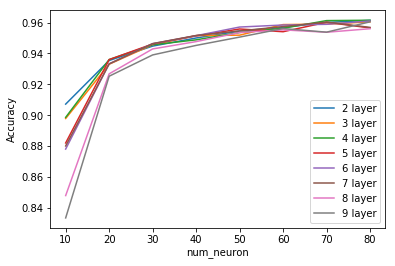

In [9]:
import warnings
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings('ignore')

num_neuron = [10, 20, 30, 40, 50, 60, 70, 80]
best_accuracy = 0
for j in range(2, 10):
    accuracy = []
    for i in num_neuron:
        hidden_layer_sizes = [i]*j
        mlp = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes, max_iter = 3, random_state = 0)
        mlp.fit(X_train_std, y_train)
        y_pred = mlp.predict(X_test_std)
        mlp_accuracy = accuracy_score(y_pred,y_test)
        accuracy.append(mlp_accuracy)
        
        if mlp_accuracy > best_accuracy:
            best_param = {'num_layer': j, 'num_neuron': i}
            best_accuracy = mlp_accuracy
    plt.plot(num_neuron, accuracy, label = "{} layer".format(j))
    plt.ylabel("Accuracy")
    plt.xlabel("num_neuron")

print("Best accuracy: {:0.6f}".format(best_accuracy))
print("Best parameters: {}".format(best_param))

plt.legend()
plt.show()